In [3]:
# Exercise 1: Multi-Layered Scatter Plot with Marginal Histograms
import pandas as pd

iris = pd.read_csv('Iris_dataset.csv')
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
iris.rename(columns={
    '5.1': 'Sepal_Length',
    '3.5': 'Sepal_Width',
    '1.4': 'Petal_Length',
    '0.2': 'Petal_Width',
    'Iris-setosa': 'Species'
}, inplace=True)
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


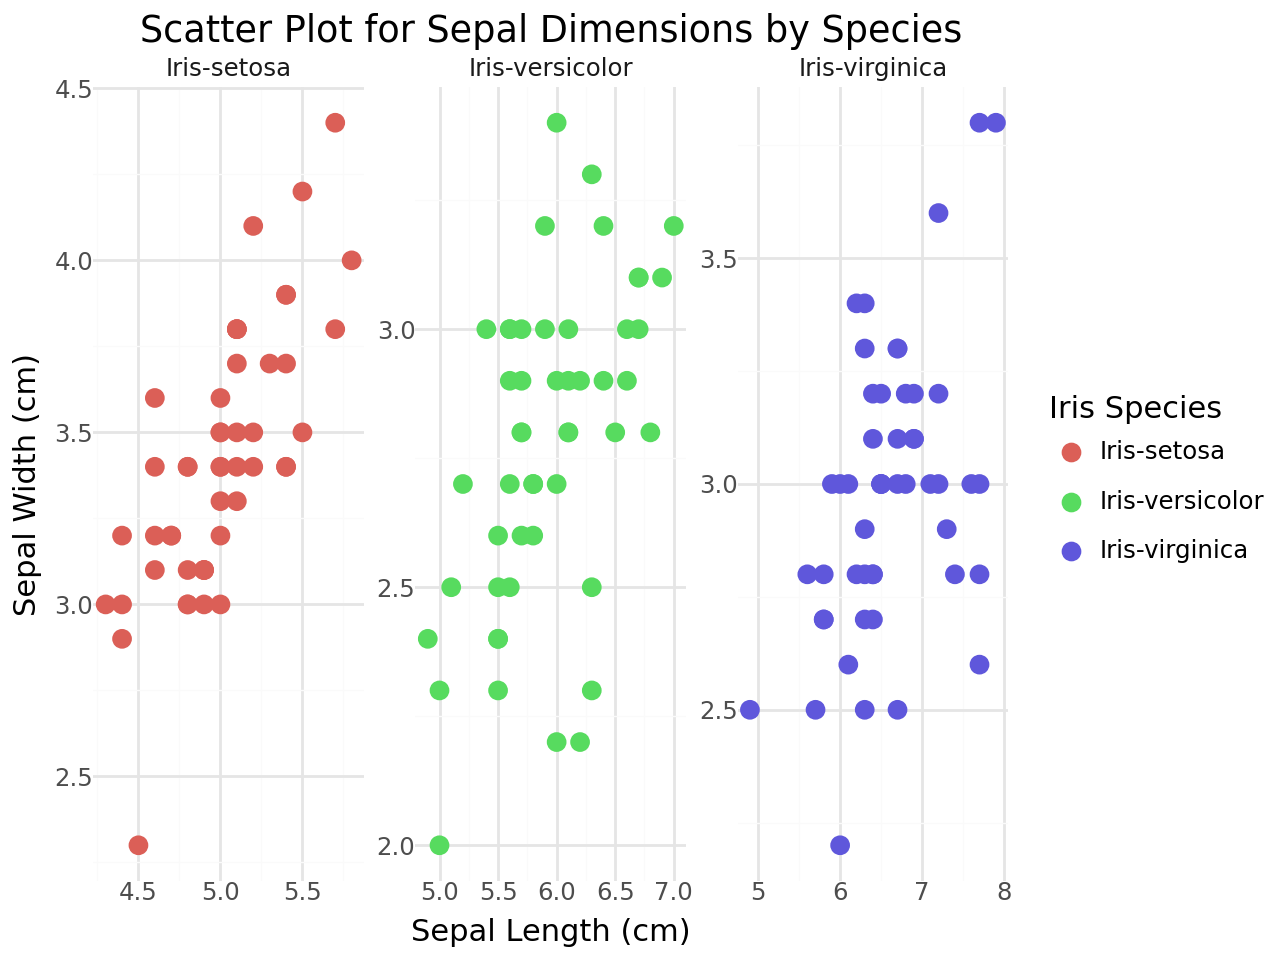

In [8]:
from plotnine import ggplot, aes, geom_point, geom_histogram, theme_minimal, labs, facet_wrap
from IPython.display import display

plot = (
    ggplot(iris, aes(x='Sepal_Length', y='Sepal_Width', color='Species'))
    + geom_point(size=3)
    + facet_wrap('Species', scales='free')
    + labs(
        title='Scatter Plot for Sepal Dimensions by Species',
        x='Sepal Length (cm)',
        y='Sepal Width (cm)',
        color='Iris Species'
    )
    + theme_minimal()
)

display(plot)

In [9]:
# Exercise 2: Interactive Facet Grid with Conditional Elements
!unzip archive.zip

Archive:  archive.zip
  inflating: Student Mental health.csv  


In [11]:
import pandas as pd

mental_health = pd.read_csv('Student_mental_health.csv')
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [13]:
mental_health['What is your CGPA?'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [14]:
mental_health['What is your CGPA?'] = mental_health['What is your CGPA?'].replace({'0 - 1.99': '1.99', '2.00 - 2.49': '2.49', '2.50 - 2.99': '299','3.00 - 3.49': '3.49', '3.50 - 4.00': '4.00','3.50 - 4.00 ': '4.00'})

In [15]:
mental_health['Age'] = mental_health['Age'].astype(float)
mental_health['What is your CGPA?'] = mental_health['What is your CGPA?'].astype(float)


In [19]:
mental_health.rename(columns={'What is your course?': 'What_is_your_course'}, inplace=True)

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


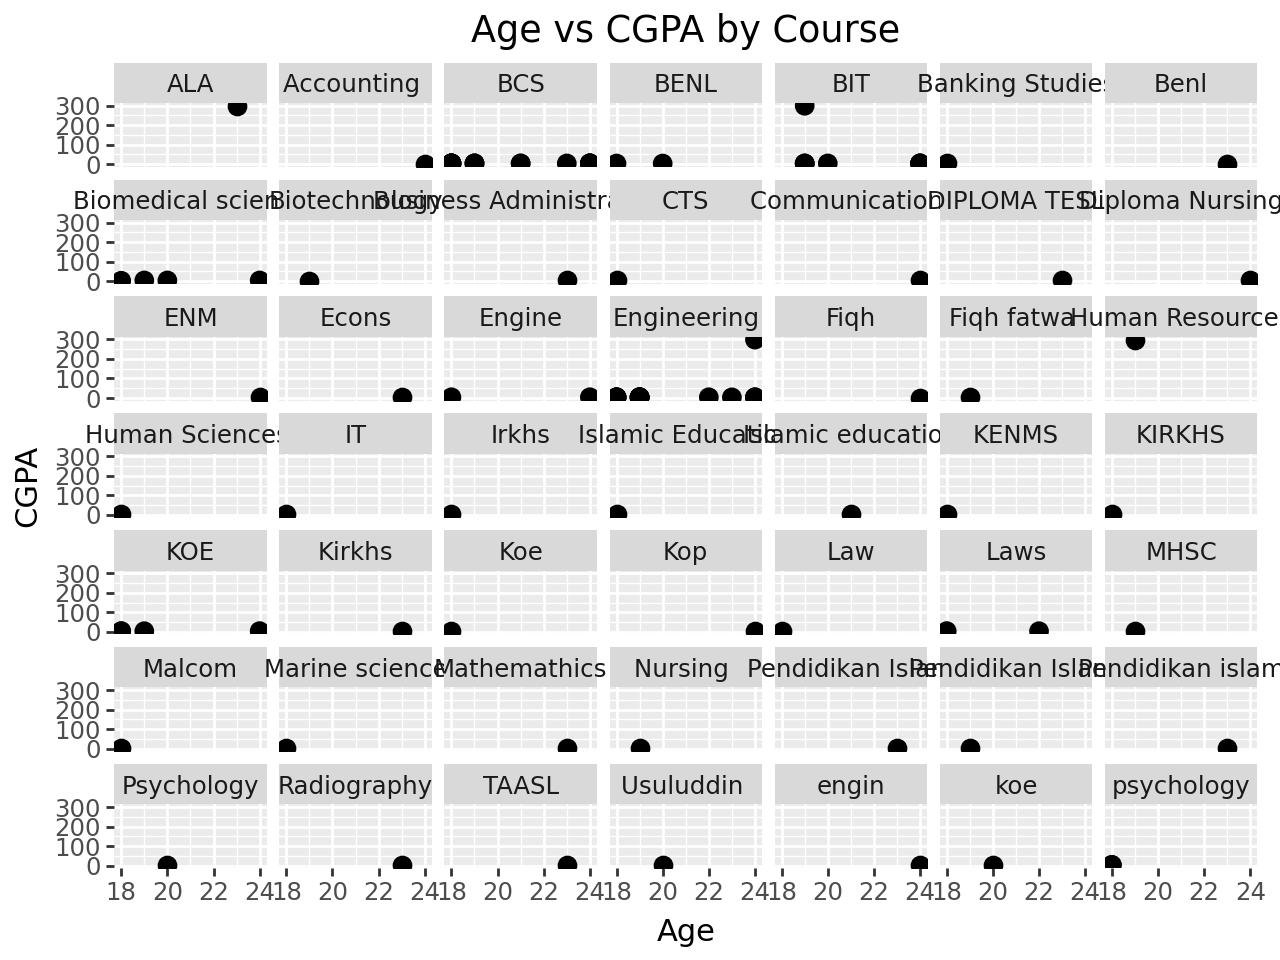

In [21]:
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal, facet_wrap
from IPython.display import display

plot = (
    ggplot(mental_health, aes(x='Age', y='What is your CGPA?'))
    + geom_point(size=3)
    + facet_wrap('What_is_your_course')
    + labs(
        title="Age vs CGPA by Course",
        x="Age",
        y="CGPA"
    )
)

display(plot)

In [22]:
# Exercise 3: Time Series Analysis with Rolling Averages and Confidence Intervals
import pandas as pd

sales_data = pd.read_csv('sales_data.csv')
sales_data.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:99: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


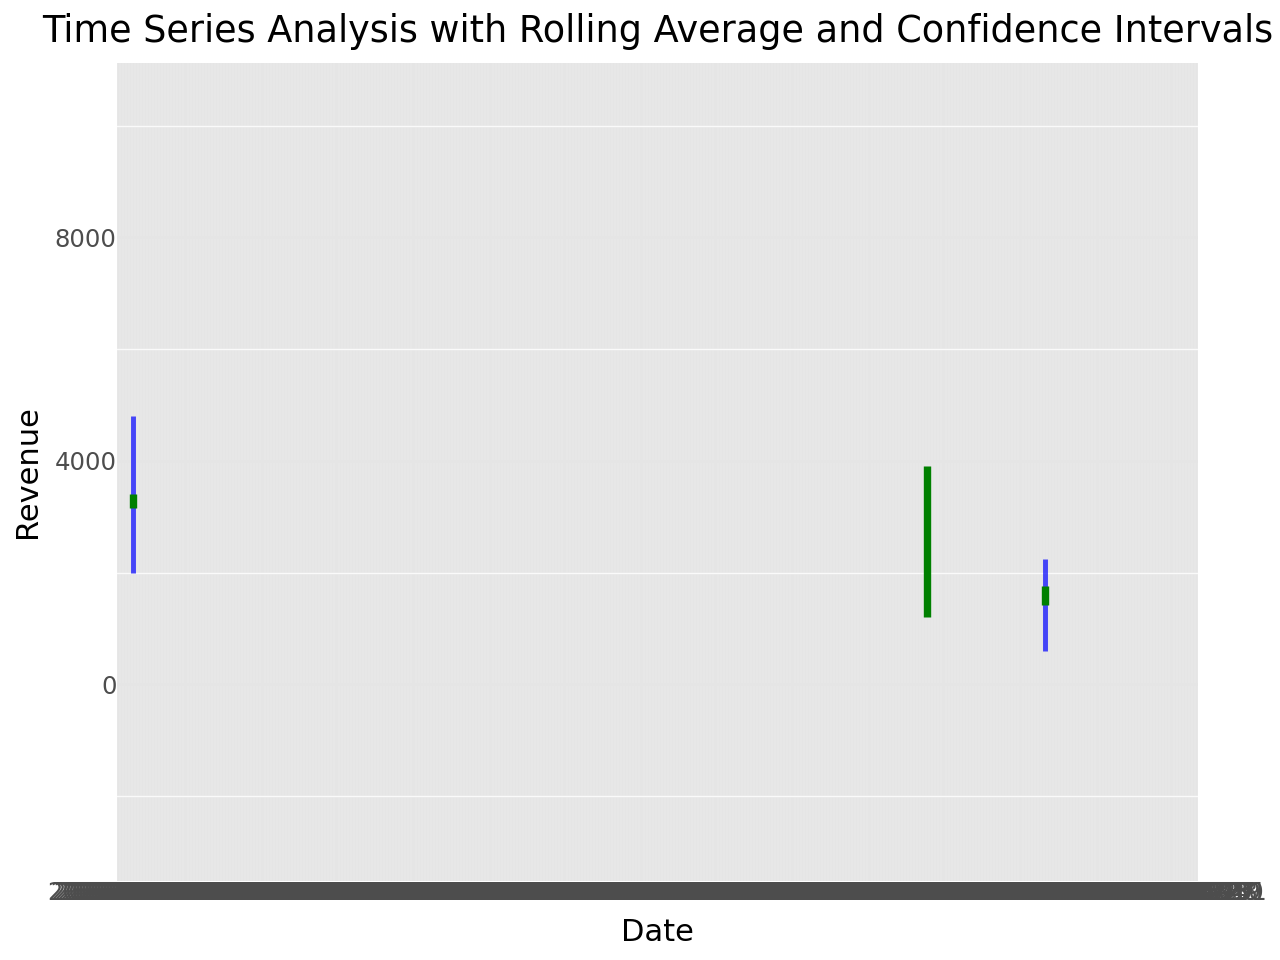

In [26]:
import numpy as np
from plotnine import ggplot, aes, geom_line, geom_ribbon, labs, theme_minimal
from scipy.stats import norm
from IPython.display import display

window_size = 2
sales_data['rolling_avg'] = sales_data['revenue'].rolling(window=window_size).mean()
sales_data['rolling_std'] = sales_data['revenue'].rolling(window=window_size).std()

confidence_level = 0.95
z_score = norm.ppf(1 - (1 - confidence_level) / 2)
sales_data['ci_upper'] = sales_data['rolling_avg'] + z_score * (sales_data['rolling_std'] / np.sqrt(window_size))
sales_data['ci_lower'] = sales_data['rolling_avg'] - z_score * (sales_data['rolling_std'] / np.sqrt(window_size))

plot = (
    ggplot(sales_data, aes(x='date'))
    + geom_line(aes(y='revenue'), color='blue', size=1, alpha=0.7)
    + geom_line(aes(y='rolling_avg'), color='green', size=1.5)
    + geom_ribbon(aes(ymin='ci_lower', ymax='ci_upper'), fill='green', alpha=0.3)
    + labs(
        title='Time Series Analysis with Rolling Average and Confidence Intervals',
        x='Date',
        y='Revenue'
    )
    + theme_minimal()
)

display(plot)